In [1]:
from qiskit.extensions import *
from qiskit import QuantumCircuit, ClassicalRegister, execute, Aer, IBMQ, transpile
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.quantum_info import Operator
from qiskit.providers.aer.library import save_statevector
from qiskit_textbook.tools import *
import numpy as np
import random

In [2]:
n = 3 #numero de qubits

N = 2**n #Tamanho da lista

quant_ele = 1 #quantidade de elementos da lista que você quer buscar

In [4]:
#Construindo a lista com todos os elementos
el = [i for i in range(N)]

#Sampleando um dos elementos da lista
ints = random.sample(el, int(quant_ele))

#construindo representação binária
w = [format(i, '0'+str(n)+'b') for i in ints]

#computando quantas vezes rodar grover
times = int(np.pi/4 * np.sqrt(N/quant_ele))
times = int(times)

print(f"Número de repetições Grover: ------- {times}")
print(f"Elementos buscados na lista: ------- {ints}------{w}")


Número de repetições Grover: ------- 2
Elementos buscados na lista: ------- [4]------['100']


# Definindo as funções de Grover

Gate 1: Oráculo

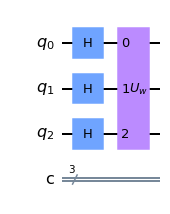

In [9]:
def Uf(n, ints, name = '$U_w$'):
    #Defining Oracle - put a negative phase on w[i]
    qc = QuantumCircuit(n, name = name)
    Uf = np.identity(N)
    
    for i in ints:
        Uf[i][i] = -1
    qc.unitary(Operator(Uf), range(n))
    return qc

qc = QuantumCircuit(n, n)
qc.h(range(n))
qc.append(Uf(n, ints),[i for i in range(n)])

#qc.save_state(label = "oracle"+str(i))
#qc.measure(range(n), range(n))

qc.draw('mpl')

In [10]:
backend = Aer.get_backend('statevector_simulator')

state = execute(qc,backend, shots = 1).result().get_statevector()
#counts - execute(qc, backend, shots = 10000).result().get_counts()
#display(plot_histogram(counts))
array_to_latex(state,pretext='\\vert \psi\\rangle = ')

<IPython.core.display.Math object>

# Gate 2: Diffuser

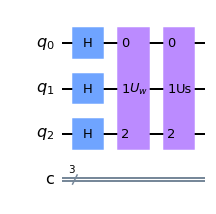

In [11]:
def Us(n, name = 'Us'):
    qc = QuantumCircuit(n, name='Us')
    qc.h(range(n))
    qc.append(Uf(n,[0]),range(n))
    qc.h(range(n))
    return qc

qc = QuantumCircuit(n, n)
qc.h(range(n))
qc.append(Uf(n,ints),[i for i in range(n)])
qc.append(Us(n,ints),[i for i in range(n)])
qc.draw('mpl')

In [12]:
backend = Aer.get_backend('statevector_simulator')

state = execute(qc,backend, shots = 1).result().get_statevector()
array_to_latex(state, pretext='\\vert \psi\\rangle = ')

<IPython.core.display.Math object>

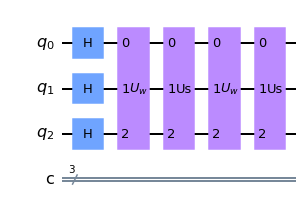

In [14]:
qc = QuantumCircuit(n,n)

qc.h(range(n))
qc.append(Uf(n, ints),[i for i in range(n)])
qc.append(Us(n, ints),[i for i in range(n)])
qc.append(Uf(n, ints),[i for i in range(n)])
qc.append(Us(n, ints),[i for i in range(n)])
          
qc.draw('mpl')

In [15]:
backend = Aer.get_backend('statevector_simulator')

state = execute(qc,backend,shots=1).result().get_statevector()
array_to_latex(state, pretext='\\vert \psi\\rangle = ')

<IPython.core.display.Math object>

In [20]:
def grover(n, ints, execution = None):
    times = int(np.pi/4*np.sqrt(2**n/len(ints)))
    times = int(times)
    
    if execution == 'svs':
        qc= QuantumCircuit(n)
        for i in range(n):
            qc.h(i)
        for i in range(times):
            qc.append(Uf(n,ints),[i for i in range(n)])
            qc.append(Us(n),[i for i in range(n)])
    else:
        qc = QuantumCircuit(n,n)
        for i in range(n):
            qc.h(i)
            
        for i in range(times):
            qc.append(Uf(n,ints),[i for i in range(n)])
            qc.append(Us(n),[i for i in range(n)])
        for i in range(n):
            qc.measure(i,i)
    return qc

Número de repetições Grover: --------2
Elementos Buscados na Lista: --------[4]---['100']


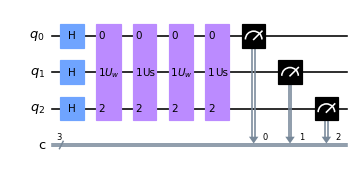

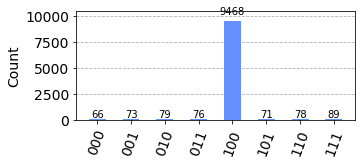

In [21]:
n = 3
ints = [4]

w = [format(i, '0'+str(n)+'b') for i in ints]
qc = grover(n, ints)

print(f"Número de repetições Grover: --------{times}")
print(f"Elementos Buscados na Lista: --------{ints}---{w}")

shots = 10000


display(qc.draw('mpl', scale=.8))
backend = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots = 10000).result().get_counts()
plot_histogram(counts, figsize =(5,2))